# Week3授業前課題2 住宅価格を予測しよう

# 1.この課題の目的

- データ分析の基本的な流れを知る
- PandasやMatplotlibに慣れる
- Kaggleのカーネルを利用する

# 2.エイムズ市の住宅価格

アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。
住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。
エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。
[wikipedia](https://en.wikipedia.org/wiki/Ames,_Iowa)

# 3.Kaggleのカーネル

Kaggleでは「カーネル」としていろいろな人がデータ探索（EDA）を行ったコードが共有されています。良いEDAをたくさん見て、ノウハウを吸収していきましょう。今回の課題をやる上でも参考にしたり、課題になっていないことに挑戦したりしてください。
これ以降Kaggleを利用していきますので、アカウントを作成してください。

# 4.データセットの準備

## 【課題1】データセットの取得

In [1]:
# Pandasライブラリをインポート
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv') # train.csvをデータフレーム形式で読み込んで表示
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## 【課題2】データセット自体の調査

KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。前回扱ったirisデータセットとの比較もすると良いでしょう。

#### 用意したデータセットの詳細
- アメリカのアイオワ州エイムスの1460棟の住宅の情報をまとめたデータセット
- 1460行81列のデータセット
- 81列の内、ID列が１列、特徴量は79列、予測しようとしている目的変数(住宅価格)が１列

#### アイオア州エイムスについて
エイムズ（Ames）は、アメリカ合衆国アイオワ州中央部に位置する都市。州都デモインの北約55kmに位置する。 人口は58,965人（2010年国勢調査）。同州ストーリー郡で最も人口の多い都市であるが、郡庁は14km東、郡中央部のネベイダに置かれている。ストーリー郡1郡のみから成るエイムズ都市圏は89,542人（2010年国勢調査）の人口を抱えている。より広域的には、エイムズは西に隣接するブーン小都市圏（ブーン郡）と共に、人口70万人を超えるデモインの広域都市圏に含まれている。

#### irisデータセットとの比較
- irisデータセットは3つのクラスの中から分類(classification)を行うデータセットとなっているが、house pricesは住宅価格を予想する(regression)データセットである。
- irisデータセットにはNaN(Not a Number)がなかったが、house pricesデータセットにはある。

# 5.データの概観
## 【課題3】データの確認
「Week3授業前課題1アヤメを分析しよう」と同様に、データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

- 各特徴量がどういったものかを見る。（数値データか文字データなど）
- 今回の目的変数はどの列か確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

### 各特徴量がどういったものかを見る。（数値データか文字データなど）
各特徴量の詳細を説明する。
まずはデータセットの先頭から5行目まで表示する。

In [2]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


次にinfo()メソッドを使用し、データの詳細を確認する。

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

上記より各特徴量は**データ数が最小7、最大1460個**で、データは**数値データ、文字データ**が混じっており、データタイプは**int64形式の特徴量が3個、float64形式のデータが35個、文字形式のデータが43個**であることがわかる。

### 今回の目的変数はどの列か確認する。

- 目的変数は右端の列の**SalePrice列**である。
- この列に格納されているデータは**物件の売却価格(単位:ドル)**である。

#### 目的変数の確認方法

今回の「House Prices」データセットはKaggleにて提供されているデータセットである為、以下のKaggle公式ページにて目的変数を確認する。

[House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

以下は上記のページの表示画面である。

Data fields　の文字の下に「SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.」(和訳：SalePrice  - 施設の売却価格（ドル）。 これが予測しようとしているターゲット変数です。)と記載があるので、House Pricesデータセットの目的変数が**SalePrice列**であることがわかる。

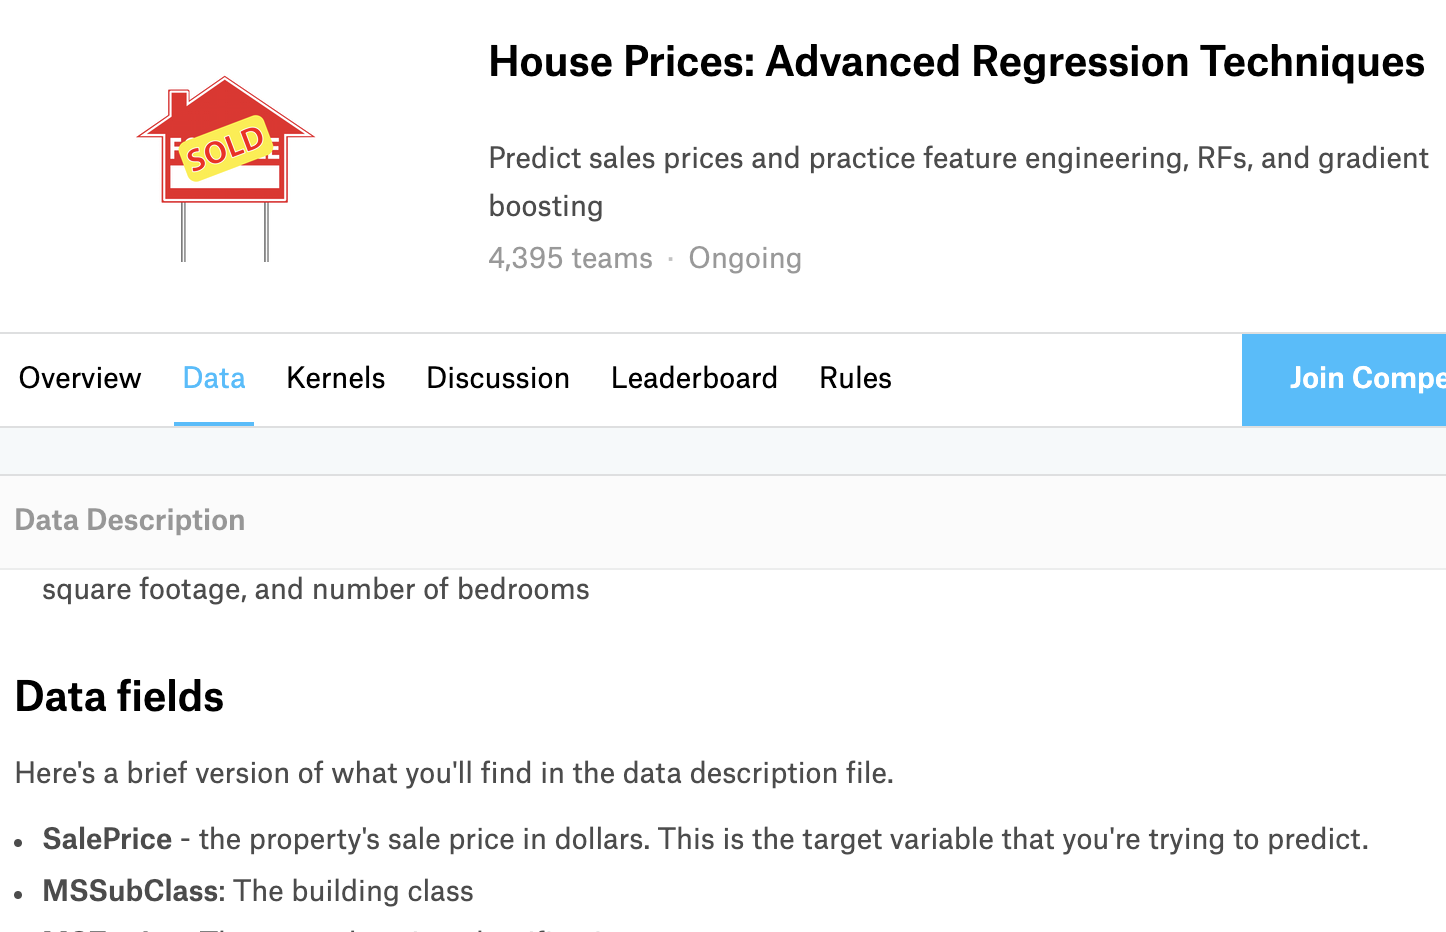

In [4]:
from IPython.display import display
from PIL import Image
display(Image.open('screen_shot.png'))

### 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

describe()メソッドにて確認が可能。
- mean　平均
- std　標準偏差
- 25%　第一四分位数
- 50%　第二四分位数
- 75%　第三四分位数

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 【課題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。

各特徴量の欠損値の有無を確認する。
欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。

ResidentMario/missingno: Missing data visualization module for Python.

欠損値が何パーセント含まれるかを確認する。

## 【課題4】欠損値への対応

欠損値に関して以下のことを行い、レポートしてください。

### ①各特徴量の欠損値の有無を確認する。

欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。

[ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)

In [6]:
# missingnoライブラリをインポート
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

##### missingnoライブラリのmatrixメソッドを使用し、欠損値の有無を表示。黒い部分が値が入っている部分、空白の部分が欠損値の部分

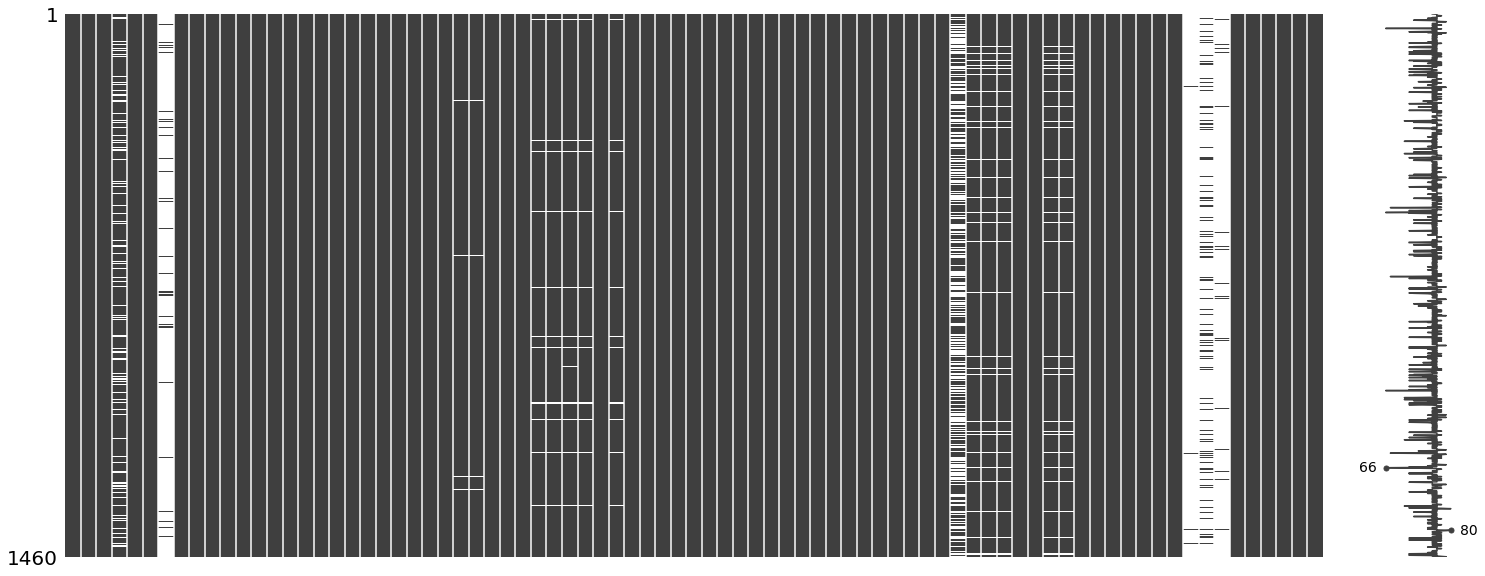

In [7]:
msno.matrix(df);

### ②欠損値が何パーセント含まれるかを確認する。

#### 1. 各特徴量のデータの個数を確認する

In [8]:
# 各特徴量の欠損値以外のデータの個数を、データフレーム numer_of_data に格納
number_of_non_missing_value = pd.DataFrame(df.count())

# number_of_non_missing_value の先頭5行のみ表示
number_of_non_missing_value.head()

,0
Id,1460
MSSubClass,1460
MSZoning,1460
LotFrontage,1201
LotArea,1460


#### 2. 各特徴量の欠損値の個数を確認する

In [9]:
# 各特徴量の欠損値の個数を、データフレーム numer_of_data に格納
number_of_missing_value = pd.DataFrame(df.isnull().sum())

# number_of_missing_value の先頭5行のみ表示
number_of_missing_value.head()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0


#### 3. 欠損値の割合を計算する　(欠損値の数　/ データの総数1460)

In [10]:
missing_ratio = pd.DataFrame(number_of_missing_value / 1460)

# missing_ratio の先頭5行のみ表示
missing_ratio.head()

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,0.177397
LotArea,0.000000


#### 4. 1〜3のデータを結合する

In [11]:
# cocatメソッドにて、各特徴量の「欠損値以外の個数、欠損値の個数、欠損値の割合」
# を横方向(axis=1)に結合
missing_data = pd.concat([number_of_non_missing_value, 
                          number_of_missing_value,
                          missing_ratio], axis=1)

# コラムを設定
missing_data.columns=['non_mising', 'missing', 'missing_ratio']

# 表示
missing_data

,non_mising,missing,missing_ratio
Id,1460,0,0.000000
MSSubClass,1460,0,0.000000
MSZoning,1460,0,0.000000
LotFrontage,1201,259,0.177397
LotArea,1460,0,0.000000
Street,1460,0,0.000000
Alley,91,1369,0.937671
LotShape,1460,0,0.000000
LandContour,1460,0,0.000000
Utilities,1460,0,0.000000


### ③5つ以上欠損値がある特徴量（列）は削除する。

##### 各特徴量の中で欠損値が5個以上の列を抽出し、データフレーム Column with 5 or more missing values に格納

In [12]:
# 各特徴量の欠損値の個数を、データフレーム numer_of_data に格納
#number_of_missing_value = pd.DataFrame([
#   df.isnull().sum() >5)
#number_of_missing_value

In [13]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### ④欠損値があるサンプル（行）は削除する。

##### dropnaメソッドにて欠損値を1個以上含む行を削除する

In [14]:
df_dropna = df.dropna()
df_dropna

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [15]:
df_dropna.count()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC      

##### 上記より、すべての行で1個以上欠損値があったことがわかる

# 6.目的変数

## 【課題5】用語の調査

以下の２つの単語を知る必要があります。これらを調査してまとめてください。
- 尖度
- 歪度

### 尖度(せんど)について

#### 1. どのような値
   - 尖度とは**確率変数の確率密度関数や頻度分布の鋭さを表す数字**である。

    
    
#### 2. 値の意味
   - 正規分布を値を基準とするかしないかで2通りの表示方法がある。
       - 基準とする場合　→　正規分布の尖度$3$を尖度$0$として計算する為、**求めた値ー3**が値となる。
       - 基準としない場合　→　求めた値を**そのまま使用**する。
       
   
   - 正規分布を値の基準とした場合の尖度の値は以下の意味を持つ
    - 正規分布と比較し、**尖度が $0$ より大きければ鋭いピークと長く太い裾を持った分布**を持ち、**尖度が $0$ より小さければより丸みがかったピークと短く細い尾を持った分布**であるという事が判断できる。また**尖度が $0$ である時は正規分布に従う事**を意味する

[参考:wikipedia](https://ja.wikipedia.org/wiki/%E5%B0%96%E5%BA%A6)

### 3. 公式

確率変数を$X$、確率分布の平均値を $\mu$、標準偏差を  $\sigma^2$とした場合の確率分布の尖度

$$\frac{ E[(X-\mu)^4] }{ \sigma^4 }$$

正規分布を値の基準とする場合

$$\frac{ E[(X-\mu)^4] }{ \sigma^4 }-3$$




### 歪度(わいど)について

#### 1. どのような値
   - 歪度とは**分布の非対称性を示す値**である。
   - 確率分布に適用した場合は、確率密度関数または確率関数 f(x) のグラフが**どの程度、左右対称**となっているかを表す。

    
    
#### 2. 値の意味
- 正規分布と比較し、**歪度が $0$ より大きければ分布の頂点が左側(横軸のマイナス方向)**にあることを、**尖度が $0$ より小さければより分布の頂点が右側(横軸のプラス側)**にあることを表す。また**尖度が $0$ である時は左右対称であり正規分布に従う事**を意味する

[参考:wikipedia](https://ja.wikipedia.org/wiki/%E6%AD%AA%E5%BA%A6)

### 3. 公式

確率変数を$X$、確率分布の平均値を $\mu$、標準偏差を  $\sigma^2$とした場合の確率分布の歪度

$$\frac{ E[(X-\mu)^3] }{ \sigma^3 }$$

# 【課題6】分布の確認
- seabornの**sns.distplot()**を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
- 目的変数に対して対数変換を行う。
- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

## seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

### distplot()を使い目的変数の分布を表示

/Users/takahiro/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


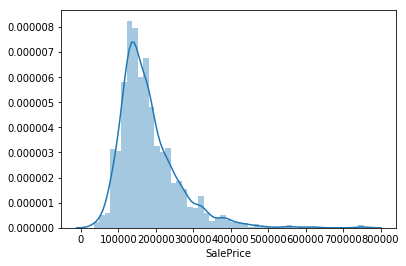

In [16]:
# distplotメソッドを使用する為、seabornライブラリをインポート
import seaborn as sns

# distplotメソッドを使用し、目的変数をグラフ表示
sns.distplot(df['SalePrice']);

### 「尖度」と「歪度」も算出する

In [17]:
# kurtメソッドを使用し、尖度を計算
kurtosis_of_objective_variable = df['SalePrice'].kurt()

print('目的変数の尖度：{}'.format(kurtosis_of_objective_variable))

目的変数の尖度：6.536281860064529


In [18]:
# skewメソッドを使用し、歪度を計算
skewness_of_objective_variable= df['SalePrice'].skew()

print('目的変数の歪度：{}'.format(skewness_of_objective_variable))

目的変数の歪度：1.8828757597682129


## 目的変数に対して対数変換を行う。

In [19]:
# np.logメソッドを使用して、目的変数の対数変換を実施
L_converted_objective_variable = np.log(df['SalePrice'])
L_converted_objective_variable

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

## 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

### distplot()を使い目的変数の分布を表示

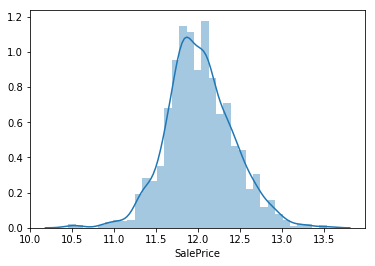

In [20]:
# distplotメソッドを使用し、対数変換後の目的変数をグラフ表示
sns.distplot(L_converted_objective_variable);

### 「尖度」と「歪度」を算出する

In [21]:
# kurtメソッドを使用し、尖度を計算
L_converted_kurtosis = L_converted_objective_variable.kurt()

# 表示
print('対数変換後の目的変数の尖度：{}'.format(L_converted_kurtosis))

対数変換後の目的変数の尖度：0.8095319958036296


In [22]:
# skewメソッドを使用し、歪度を計算
L_coverted_skewness= L_converted_objective_variable.skew()

# 表示
print('対数変換後の目的変数の歪度：{}'.format(L_coverted_skewness))

対数変換後の目的変数の歪度：0.12133506220520406


## 対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。

### 対数変換前後の比較をしやすいように、以下の作業を行う

### ①目的変数の対数変換前後のグラフを表示する

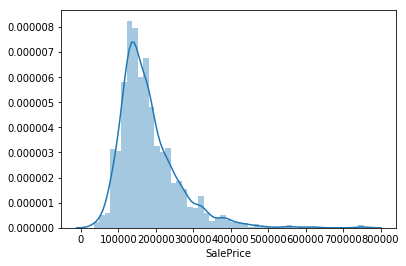

In [23]:
# グラフを重ね
sns.distplot(df['SalePrice'], kde=True)

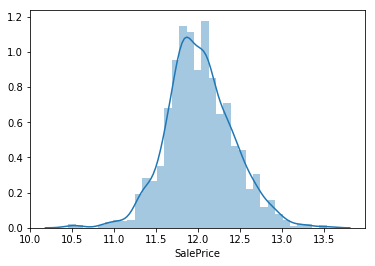

In [24]:
# distplotメソッドを使用し、対数変換後の目的変数をグラフ表示
sns.distplot(L_converted_objective_variable);

### ②尖度・歪度をデータフレームで表示する

In [25]:
# データフレームを作成する為、numpy配列を作成する
# 1行目→対数変換前後の尖度　2行目→対数変換前後の歪度
np_comparison = np.array([ [kurtosis_of_objective_variable, L_converted_kurtosis],
                           [skewness_of_objective_variable, L_coverted_skewness]])
np_comparison

array([[6.53628186, 0.809532  ],
       [1.88287576, 0.12133506]])

In [26]:
# 比較用のデータフレームを作成する
df_comparison = pd.DataFrame(np_comparison,
                             columns=['before_conversion','after_conversion'],
                             index = ['kurtosis', 'skewness'])
df_comparison

,before_conversion,after_conversion
kurtosis,6.536282,0.809532
skewness,1.882876,0.121335


### 以下に尖度と歪度の対数変換前後の値の考察を記載する

#### 尖度について
- 値の変化　→　より正規分布の値である$0$に近づいている
- グラフの変化　→　盛り上がり部分が変換後の方がよりなだらかになっており、正規分布に近づいている

#### 歪度について
- 値の変化　→　正規分布の値である$0$に近づいている
- グラフの変化　→　最大値の箇所がグラフ中央に変化しており、グラフの左右の勾配も均等に近づいている

# 7.特徴量

## 【課題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

### 補足

重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

### 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

In [27]:
# データフレームから特徴量と目的変数(１列目〜８1列目)を抽出する 
feature = df.iloc[:,1:81]
feature

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [28]:
# pandasライブラリのcorrメソッドを呼び出し、
# パラメータにpearsonを指定し(標準)相関係数行列を計算
# 欠損値は除外される為、特徴量が36個となる。
feature_corr = feature.corr(method='pearson')
feature_corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


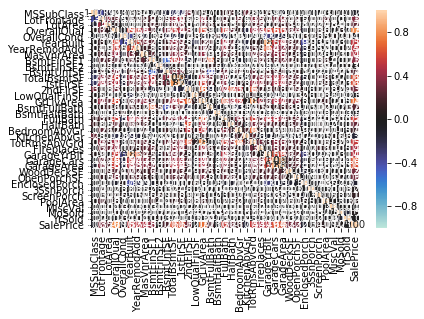

In [29]:
# 特徴量の相関係数行列のヒートマップを作成する
# seabornライブラリのheatmapメソッドを使用する
sns.heatmap(feature_corr,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.2f', # テキストの表示形式を小数第2位まで表示するよう指定。
            xticklabels=feature_corr.columns.values,
            yticklabels=feature_corr.columns.values
           )
#plt.figure(figsize=(1000000,100))
plt.show()

### 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

In [30]:
# 相関係数行列から目的変数の列の１行目から３６行目を抽出し、Series型からリスト型に変換
# ※37列目を抽出しない理由→37行目は「目的変数」同士の相関係数(1.0)が記載されている為、不要
correlation_high_ten = feature_corr.iloc[:36:,36]
correlation_high_ten

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Name: SalePrice, dtype: float64

In [31]:
# 値で降順にソートし、上位１０個の特徴量を抽出する
correlation_high_ten = correlation_high_ten.sort_values(ascending = False)[:10]
correlation_high_ten

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [32]:
# 特徴量の名前を抽出する
correlation_high_ten.index

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

In [33]:
# データフレームから抽出した10個の特徴量のみ抽出する
correlation_high_ten_df = df.loc[:,correlation_high_ten.index]
correlation_high_ten_df

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,548,856,856,2,8,2003,2003
1,6,1262,2,460,1262,1262,2,6,1976,1976
2,7,1786,2,608,920,920,2,6,2001,2002
3,7,1717,3,642,756,961,1,7,1915,1970
4,8,2198,3,836,1145,1145,2,9,2000,2000
5,5,1362,2,480,796,796,1,5,1993,1995
6,8,1694,2,636,1686,1694,2,7,2004,2005
7,7,2090,2,484,1107,1107,2,7,1973,1973
8,7,1774,2,468,952,1022,2,8,1931,1950
9,5,1077,1,205,991,1077,1,5,1939,1950


In [34]:
# pandasライブラリのcorrメソッドを呼び出し、
# パラメータにpearsonを指定し(標準)相関係数行列を計算
correlation_high_ten_corr = correlation_high_ten_df.corr(method='pearson')
correlation_high_ten_corr

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
OverallQual,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855
YearRemodAdd,0.550684,0.287389,0.420622,0.371600,0.291066,0.240379,0.439046,0.191740,0.592855,1.000000


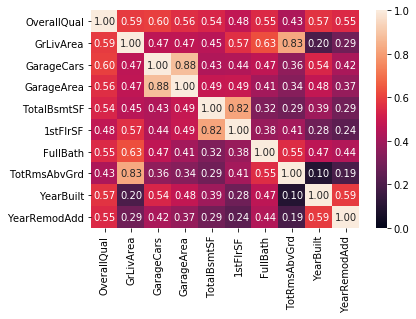

In [35]:
# 特徴量の相関係数行列のヒートマップを作成する
# seabornライブラリのheatmapメソッドを使用する
sns.heatmap(correlation_high_ten_corr,
            vmin=-0,
            vmax=1.0,
            #center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.2f', # テキストの表示形式を小数第2位まで表示するよう指定。
            xticklabels=correlation_high_ten_corr.columns.values,
            yticklabels=correlation_high_ten_corr.columns.values
           )
plt.show()

### 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

#### 以下に目的変数SalePriceと相関係数高い上位10個の特徴量についての考察を記載する

##### 1. 調査結果を表示

|特徴量名|意味|
|:---|:---:|
|OverallQual|全体的な素材と仕上げの品質|
|GrLivArea|床上面積(単位:平方フィート)|
|GarageCars|ガレージサイズ（単位:平方フィート）|
|GarageArea|ガレージサイズ（単位:平方フィート）|
|TotalBsmtSF|地下室の面積(単位:平方フィート)|
|1stFlrSF|1階の床上面積(単位:平方フィート)|
|FullBath|バスルーム(浴槽・シャワー・洗面台・便器の4点が備え付けられた部屋)の数|
|TotRmsAbvGrd|総客室数（バスルームは含まない）|
|YearBuilt| 建設した年|
|YearRemodAdd|改造した年|

以下に目的変数に対しての各特徴量の相関係数を表示する。

In [36]:
correlation_high_ten

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

##### 2. 調査結果の考察
- 特徴量は主に「**面積**」「**建設年度**」「**品質**」「**部屋の数**」に関係した特徴量となっており、特に「面積」についての特徴量が多い
- 相関係数は「品質」「面積」「部屋の数」「建設年度」の順に高く、特に「OverallQual」と「GrLivArea」は相関係数が0.7以上となっており、他の相関係数と比較し高い値となっている

#### 上記より目的変数SalePriceは各特徴量の中で「品質」と「面積」に関連する特徴量について高い相関関係をもつことがわかる

### 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

In [37]:
# itertoolsライブラリをインポート
import itertools

In [38]:
# combinationsメソッドにて10個の特徴量の中で2個選ぶ場合の全ての組み合わせを求める
combination_list = list(itertools.combinations(correlation_high_ten.index, 2))
combination_list

[('OverallQual', 'GrLivArea'),
 ('OverallQual', 'GarageCars'),
 ('OverallQual', 'GarageArea'),
 ('OverallQual', 'TotalBsmtSF'),
 ('OverallQual', '1stFlrSF'),
 ('OverallQual', 'FullBath'),
 ('OverallQual', 'TotRmsAbvGrd'),
 ('OverallQual', 'YearBuilt'),
 ('OverallQual', 'YearRemodAdd'),
 ('GrLivArea', 'GarageCars'),
 ('GrLivArea', 'GarageArea'),
 ('GrLivArea', 'TotalBsmtSF'),
 ('GrLivArea', '1stFlrSF'),
 ('GrLivArea', 'FullBath'),
 ('GrLivArea', 'TotRmsAbvGrd'),
 ('GrLivArea', 'YearBuilt'),
 ('GrLivArea', 'YearRemodAdd'),
 ('GarageCars', 'GarageArea'),
 ('GarageCars', 'TotalBsmtSF'),
 ('GarageCars', '1stFlrSF'),
 ('GarageCars', 'FullBath'),
 ('GarageCars', 'TotRmsAbvGrd'),
 ('GarageCars', 'YearBuilt'),
 ('GarageCars', 'YearRemodAdd'),
 ('GarageArea', 'TotalBsmtSF'),
 ('GarageArea', '1stFlrSF'),
 ('GarageArea', 'FullBath'),
 ('GarageArea', 'TotRmsAbvGrd'),
 ('GarageArea', 'YearBuilt'),
 ('GarageArea', 'YearRemodAdd'),
 ('TotalBsmtSF', '1stFlrSF'),
 ('TotalBsmtSF', 'FullBath'),
 ('TotalBs

In [39]:
s1 = df.loc[:,'OverallQual']
s1.head()

0    7
1    6
2    7
3    7
4    8
Name: OverallQual, dtype: int64

In [40]:
s2 = df.loc[:,'GrLivArea']
s2.head()

0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64

In [41]:
res = s1.corr(s2)
res

0.5930074300286503

In [42]:
# 相関係数を格納するリストを定義
corr_list = []

# 特徴量の組み合わせをfor文で抽出する
for x, y in combination_list:

    # 相関係数を求める2つの特徴量を抽出する
    s1 = df.loc[:,x]
    s2 = df.loc[:,y]
    
    #pd.corrメソッドで相関係数を計算
    correlation_coefficient = s1.corr(s2)
    
    # リストに追加する内容をまとめる　[特徴量1 特徴量2 相関係数]
    append_content = [x, y, correlation_coefficient]
    
    # リストcorr_listに追加する
    corr_list.append(append_content)

corr_list

[['OverallQual', 'GrLivArea', 0.5930074300286503],
 ['OverallQual', 'GarageCars', 0.600670716590716],
 ['OverallQual', 'GarageArea', 0.5620217566126078],
 ['OverallQual', 'TotalBsmtSF', 0.5378084986123909],
 ['OverallQual', '1stFlrSF', 0.4762238290781767],
 ['OverallQual', 'FullBath', 0.5505997093682533],
 ['OverallQual', 'TotRmsAbvGrd', 0.42745234327798926],
 ['OverallQual', 'YearBuilt', 0.5723227689623615],
 ['OverallQual', 'YearRemodAdd', 0.5506839241941723],
 ['GrLivArea', 'GarageCars', 0.4672474187951871],
 ['GrLivArea', 'GarageArea', 0.4689974773229655],
 ['GrLivArea', 'TotalBsmtSF', 0.454868202547903],
 ['GrLivArea', '1stFlrSF', 0.5660239689357484],
 ['GrLivArea', 'FullBath', 0.6300116462511144],
 ['GrLivArea', 'TotRmsAbvGrd', 0.8254893743088432],
 ['GrLivArea', 'YearBuilt', 0.19900971367645792],
 ['GrLivArea', 'YearRemodAdd', 0.2873885196503328],
 ['GarageCars', 'GarageArea', 0.8824754142814629],
 ['GarageCars', 'TotalBsmtSF', 0.4345848342916901],
 ['GarageCars', '1stFlrSF', 0.

In [43]:
# データフレーム化
corr_df = pd.DataFrame(corr_list, columns=['feature1', 'feature2', 'correlation_coefficient'])
corr_df

,feature1,feature2,correlation_coefficient
0,OverallQual,GrLivArea,0.593007
1,OverallQual,GarageCars,0.600671
2,OverallQual,GarageArea,0.562022
3,OverallQual,TotalBsmtSF,0.537808
4,OverallQual,1stFlrSF,0.476224
5,OverallQual,FullBath,0.550600
6,OverallQual,TotRmsAbvGrd,0.427452
7,OverallQual,YearBuilt,0.572323
8,OverallQual,YearRemodAdd,0.550684
9,GrLivArea,GarageCars,0.467247


In [44]:
# 相関係数で降順にソートする
corr_df = corr_df.sort_values('correlation_coefficient', ascending=False)
corr_df

,feature1,feature2,correlation_coefficient
17,GarageCars,GarageArea,0.882475
14,GrLivArea,TotRmsAbvGrd,0.825489
30,TotalBsmtSF,1stFlrSF,0.819530
13,GrLivArea,FullBath,0.630012
1,OverallQual,GarageCars,0.600671
0,OverallQual,GrLivArea,0.593007
44,YearBuilt,YearRemodAdd,0.592855
7,OverallQual,YearBuilt,0.572323
12,GrLivArea,1stFlrSF,0.566024
2,OverallQual,GarageArea,0.562022


In [45]:
# 相関係数が高い組み合わせを3組抽出する
corr_df_3 = corr_df.iloc[:3,:]
corr_df_3

,feature1,feature2,correlation_coefficient
17,GarageCars,GarageArea,0.882475
14,GrLivArea,TotRmsAbvGrd,0.825489
30,TotalBsmtSF,1stFlrSF,0.819530


# （オプション）【課題8】重要度の算出
ランダムフォレストという機械学習手法を用いることで、重要度の値を算出できます。この値は推定を行った時に、各特徴量がどれだけ推定値に寄与しているかを表すものです。ランダムフォレストは推定によく使われる手法ですが、ここでは推定自体が目的ではなく、あくまで重要度を算出するために使います。

## ランダムフォレストを用いて特徴量毎の重要度を算出

### ①文字列のデータをワンホットエンコーディングにて数値に変換する

In [46]:
pd.set_option('display.max_rows', 300)
# get_dummiesメソッドにてワンホットエンコーディングを実施する
df_dummies = pd.get_dummies(df)
df_dummies.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


### ②欠損値を列の平均値で保管する

In [47]:
# 欠損値があるかを確認
df_dummies.isnull().any(0)

Id                       False
MSSubClass               False
LotFrontage               True
LotArea                  False
OverallQual              False
OverallCond              False
YearBuilt                False
YearRemodAdd             False
MasVnrArea                True
BsmtFinSF1               False
BsmtFinSF2               False
BsmtUnfSF                False
TotalBsmtSF              False
1stFlrSF                 False
2ndFlrSF                 False
LowQualFinSF             False
GrLivArea                False
BsmtFullBath             False
BsmtHalfBath             False
FullBath                 False
HalfBath                 False
BedroomAbvGr             False
KitchenAbvGr             False
TotRmsAbvGrd             False
Fireplaces               False
GarageYrBlt               True
GarageCars               False
GarageArea               False
WoodDeckSF               False
OpenPorchSF              False
EnclosedPorch            False
3SsnPorch                False
ScreenPo

In [48]:
#　それぞれの列の平均値で補完
df_dummies = df_dummies.fillna(df_dummies.mean())

In [49]:
# 再度、欠損値があるかを確認
df_dummies.isnull().any(0)

Id                       False
MSSubClass               False
LotFrontage              False
LotArea                  False
OverallQual              False
OverallCond              False
YearBuilt                False
YearRemodAdd             False
MasVnrArea               False
BsmtFinSF1               False
BsmtFinSF2               False
BsmtUnfSF                False
TotalBsmtSF              False
1stFlrSF                 False
2ndFlrSF                 False
LowQualFinSF             False
GrLivArea                False
BsmtFullBath             False
BsmtHalfBath             False
FullBath                 False
HalfBath                 False
BedroomAbvGr             False
KitchenAbvGr             False
TotRmsAbvGrd             False
Fireplaces               False
GarageYrBlt              False
GarageCars               False
GarageArea               False
WoodDeckSF               False
OpenPorchSF              False
EnclosedPorch            False
3SsnPorch                False
ScreenPo

In [50]:
# 学習モデル作成の為、特徴量と目的変数を抽出する　(ID列と目的変数列は場外する)

# 特徴量を抽出する(dropメソッドでId列、SalePrice列を削除する)
features = df_dummies.drop(['Id', 'SalePrice'], axis=1)
features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.000000,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.000000,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.000000,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.000000,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.000000,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
5,50,85.000000,14115,5,5,1993,1995,0.0,732,0,...,0,0,0,1,0,0,0,0,1,0
6,20,75.000000,10084,8,5,2004,2005,186.0,1369,0,...,0,0,0,1,0,0,0,0,1,0
7,60,70.049958,10382,7,6,1973,1973,240.0,859,32,...,0,0,0,1,0,0,0,0,1,0
8,50,51.000000,6120,7,5,1931,1950,0.0,0,0,...,0,0,0,1,1,0,0,0,0,0
9,190,50.000000,7420,5,6,1939,1950,0.0,851,0,...,0,0,0,1,0,0,0,0,1,0


In [51]:
# 目的変数を抽出する(SalePrice列を抽出する)
objective_variable = df_dummies.loc[: , ['SalePrice']]
objective_variable

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
5,143000
6,307000
7,200000
8,129900
9,118000


In [52]:
X = features.values
X

array([[6.000e+01, 6.500e+01, 8.450e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+01, 8.000e+01, 9.600e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [6.000e+01, 6.800e+01, 1.125e+04, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [7.000e+01, 6.600e+01, 9.042e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+01, 6.800e+01, 9.717e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+01, 7.500e+01, 9.937e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [53]:
# 目的変数 y の用意
y = objective_variable.values
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [54]:
# モデルに学習させる為にravelメソッドにて各値を多次元配列から１次元配列に変更する
# そのまま読み込ませた場合、警告文が表示される
y = objective_variable.values.ravel()
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

### ②特徴量と目的変数を学習データとテストデータに分割する

In [55]:
# train_test_splitメソッドをインポート
from sklearn.model_selection import train_test_split

# DicisionTreeClassifierメソッドをインポート
from sklearn.ensemble import RandomForestClassifier

# 各特徴量と目的変数を学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [56]:
X_train.shape

(1168, 288)

In [57]:
y_train.shape

(1168,)

In [58]:
# モデルを作成(決定木は１０に設定)
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
#　特徴量の重要度を格納するリスト feature_importances
feature_importances = []

# for文で特徴量の重要度を格納
for i, feat in enumerate(features.columns):
    feature_importances.append([feat, model.feature_importances_[i]])

# リストを表示
importance_df = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
importance_df

,feature,importance
0,MSSubClass,0.009749
1,LotFrontage,0.023811
2,LotArea,0.028323
3,OverallQual,0.014956
4,OverallCond,0.011428
5,YearBuilt,0.025359
6,YearRemodAdd,0.021405
7,MasVnrArea,0.015179
8,BsmtFinSF1,0.022000
9,BsmtFinSF2,0.005126


# （オプション）【課題9】さらなる探索
Kaggleのカーネルを参考に、ここまでの課題にないことにも挑戦し、ノートブックにまとめてください。

## ①作成したランダムフォレストにテストデータを投入し予測精度を求める

In [60]:
# scoreメソッドで精度を求める
print('Test set score {}'.format(model.score(X_test, y_test)))

Test set score 0.003424657534246575


## ②決定木の総数と決定木の深度を変更し予測精度を求める

In [68]:
# モデルを作成(決定木の総数を10→100へ、深度を制限なし→10に変更)
model2 = RandomForestClassifier(n_estimators=100, max_depth=10)

# 学習モデル作成
model2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
# 予測精度を表示
print('Test set score {}'.format(model2.score(X_test, y_test)))

Test set score 0.00684931506849315


## 考察
- 決定木の深度を10から100への変更前後で予測精度が２倍程度となり、パラメータ変更が予測精度の向上に効果的であったことを確認
- 更に予測精度の向上を行う場合は、追加のデータの前処理(例　目的変数に関係のある特徴量のみ使用してモデルを作成する等)の実施、別の機械学習モデルの使用等が考えられる。